# Prueba de hipótesis de dos grupos de medias

In [2]:
from symbulate import *
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt

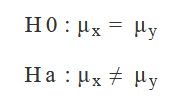

In [3]:
coca = pdr.get_data_yahoo('KO', start="01/01/2017", interval="d")
coca

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,41.810001,41.279999,41.500000,41.799999,14711000.0,34.991787
2017-01-04,41.970001,41.590000,41.880001,41.650002,9959400.0,34.866215
2017-01-05,41.860001,41.529999,41.660000,41.750000,8968300.0,34.949932
2017-01-06,41.810001,41.540001,41.700001,41.740002,10246600.0,34.941559
2017-01-09,41.580002,41.209999,41.230000,41.320000,14822500.0,34.589977
...,...,...,...,...,...,...
2022-08-12,63.759998,63.090000,63.430000,63.700001,9483700.0,63.700001
2022-08-15,64.690002,63.570000,63.639999,64.500000,9863300.0,64.500000
2022-08-16,65.230003,64.330002,64.570000,65.029999,9569600.0,65.029999


In [4]:
pepsi = pdr.get_data_yahoo('PEP', start="01/01/2017", interval="d")
pepsi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,105.089996,104.209999,104.940002,104.650002,3741200.0,89.133156
2017-01-04,105.629997,104.790001,105.110001,104.849998,3029700.0,89.303482
2017-01-05,105.120003,104.190002,104.519997,104.709999,5087200.0,89.184265
2017-01-06,105.160004,104.120003,104.980003,104.559998,4109700.0,89.056503
2017-01-09,104.260002,103.250000,104.160004,103.459999,5603500.0,88.119606
...,...,...,...,...,...,...
2022-08-12,177.380005,175.380005,175.929993,177.330002,3756200.0,177.330002
2022-08-15,179.360001,176.800003,177.770004,179.279999,3043100.0,179.279999
2022-08-16,180.699997,178.639999,179.779999,180.320007,3395700.0,180.320007


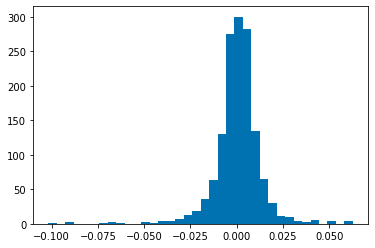

In [5]:
#Retorno continuo de coca
coca["r"] = np.log(coca['Adj Close']) - np.log(coca['Adj Close'].shift(1))
plt.hist(coca["r"], bins=36)
plt.show()

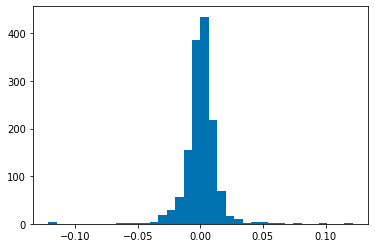

In [6]:
#Retorno continuo de pepsi
pepsi["r"] = np.log(pepsi['Adj Close']) - np.log(pepsi['Adj Close'].shift(1))
plt.hist(pepsi["r"], bins=36)
plt.show()

In [7]:
#Media
coca_mean = coca["r"].mean()
print("Media de coca:", coca_mean)
pepsi_mean = pepsi["r"].mean()
print("Media de pepsi:", pepsi_mean)

Media de coca: 0.0004397265632080191
Media de pepsi: 0.0004979132692901723


In [8]:
#Varianza
coca_var = coca["r"].var()
print("Varianza de coca:", coca_var)
pepsi_var = pepsi["r"].var()
print("Varianza de pepsi:", pepsi_var)

Varianza de coca: 0.00016273200985769557
Varianza de pepsi: 0.00017174928062759206


In [9]:
#Desviasión estándar
coca_std = coca["r"].std()
print("Desviación estándar de coca:", coca_std)
pepsi_std = pepsi["r"].std()
print("Desviasión estándar de pepsi:", pepsi_std)

Desviación estándar de coca: 0.012756645713419165
Desviasión estándar de pepsi: 0.013105314976283174


In [10]:
# t-value
t_value = (coca_mean - pepsi_mean) / math.sqrt((coca_var + pepsi_var) / coca["r"].count())
t_value
#Según el t_value arrojado en el código anterior, la diferencia de la distancia de desviación estándar de coca está a -0.1212 veces de pepsi.

-0.11972076529383283

# Nivel de confianza, error I y valor p
El nivel de confianza de una prueba está relacionado con el nivel de error de la prueba; para un nivel de confianza al 95% puede terminar en 5% errónea, y esto es error I.
El valor p es la probabilidad de que nos equivoquemos y rechazar la hipótesis nula.
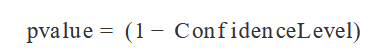

En donde el nivel de confianza se determina por el valor t.

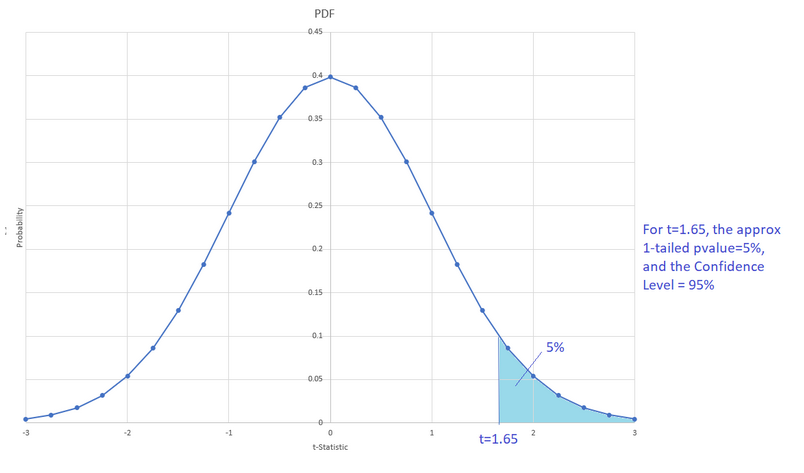

In [11]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

In [12]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [13]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4603615723462444

In [14]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.1475571290162129

In [15]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4603615723462442, pvalue=0.14755712901621287)

In [16]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

C:\Users\Keyuan\AppData\Local\Programs\Python\Python310\lib\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033564  0.162006  0.019792  -0.005952  0.073081
 1      INTC   67.0  0.001707  0.075083  0.009173  -0.016607  0.020021
 2  combined  134.0  0.017636  0.126797  0.010954  -0.004030  0.039301,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0319
 1       Degrees of freedom =   93.9238
 2                        t =    1.4604
 3    Two side test p value =    0.1476
 4   Difference < 0 p value =    0.9262
 5   Difference > 0 p value =    0.0738
 6                Cohen's d =    0.2523
 7                Hedge's g =    0.2509
 8            Glass's delta =    0.1966
 9              Pearson's r =    0.1490)

# Medidas de relación lineal

In [17]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

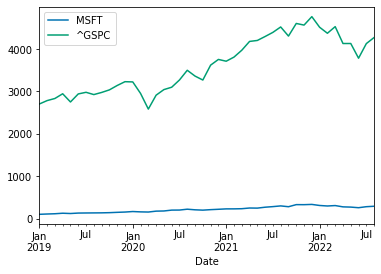

In [18]:
#Comparación
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [19]:
#Convertir la grafica a porcentaje de crecimiento, dividiendo el precio por la primera
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

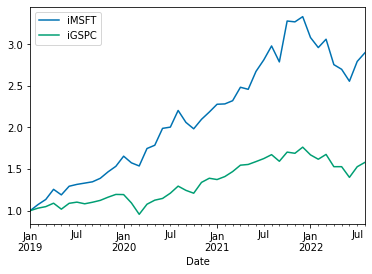

In [20]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [21]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [22]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


<Figure size 432x288 with 0 Axes>

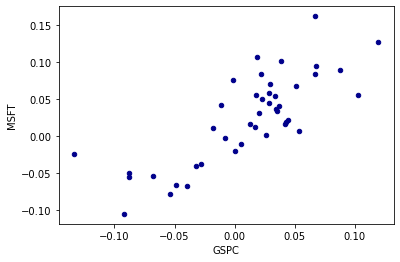

In [23]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

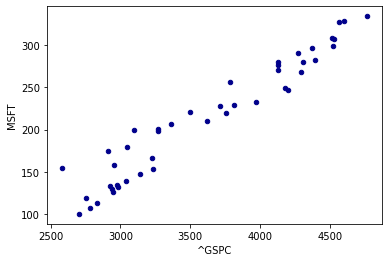

In [24]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

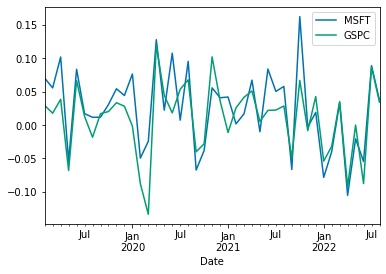

In [25]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

# Covarianza
La covarianza es el promedio de el producto de las desviaciones (X y Y) correspondientes, es el valor para predecir qué hace la y cuando x se aumenta o se disminuye, de esta manera, podemos saber el comportamiento de las variables involucrados.
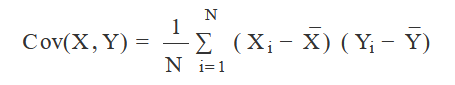

# Correlación
La correlación se optiene dividiendo la covarianza entre el producto de las desviaciones estándares de cada variables, es un valor para determinar la probabilidad de cambio de un variable si el otro se aumenta o se disminuye.
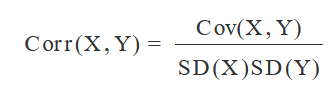

Si la corr(x,y) es igual a 0.5, x se aumenta y y tiene un 50% de probabilidad de que se aumente también.

In [26]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002516485988237611

In [28]:
#Usando Numpy
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00354923, 0.00251649],
       [0.00251649, 0.00284615]])

In [29]:
cov = covm[0,1]
cov

0.0025164859882376104

In [30]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.       , 0.7917695],
       [0.7917695, 1.       ]])

In [31]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7917694954032316

In [32]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

PearsonRResult(statistic=0.7917694954032316, pvalue=2.5758420664547024e-10)